In [1]:
import numpy as np
import pandas as pd
import torch
import wandb
from torch.utils.data import DataLoader

import sys
sys.path.append('..')

from datasets import BrainFeaturesDataset
from models import SimpleMLP
from inference import enable_dropout

In [7]:
device = torch.device('cpu')
run_id = 'tjiagom/adni_phenotypes/2cxy59fk'
api = wandb.Api()
best_run = api.run(run_id)

# For SHAP's background
train_dataset = BrainFeaturesDataset('../data/adni_train_scaled_corrected.csv')

model = SimpleMLP(dim_in=train_dataset.X.shape[1], dropout_rate=best_run.config['dropout']).to(device)

restored_path = wandb.restore('simple_mlp.pt', run_path=run_id)
model.load_state_dict(torch.load(restored_path.name))
model.eval()

enable_dropout(model)

ukb_dataset = BrainFeaturesDataset('../data/ukb_scaled_corrected.csv', has_target=False, keep_ids=True)
ukb_loader = DataLoader(ukb_dataset, batch_size=200, shuffle=False)

Enabling dropout layer.


In [23]:
FEATURES_CORTICAL = ['thickness_bankssts_lh', 'thickness_caudalanteriorcingulate_lh',
                     'thickness_caudalmiddlefrontal_lh', 'thickness_cuneus_lh', 'thickness_entorhinal_lh',
                     'thickness_fusiform_lh', 'thickness_inferiorparietal_lh', 'thickness_inferiortemporal_lh',
                     'thickness_isthmuscingulate_lh', 'thickness_lateraloccipital_lh',
                     'thickness_lateralorbitofrontal_lh', 'thickness_lingual_lh', 'thickness_medialorbitofrontal_lh',
                     'thickness_middletemporal_lh', 'thickness_parahippocampal_lh', 'thickness_paracentral_lh',
                     'thickness_parsopercularis_lh', 'thickness_parsorbitalis_lh', 'thickness_parstriangularis_lh',
                     'thickness_pericalcarine_lh', 'thickness_postcentral_lh', 'thickness_posteriorcingulate_lh',
                     'thickness_precentral_lh', 'thickness_precuneus_lh', 'thickness_rostralanteriorcingulate_lh',
                     'thickness_rostralmiddlefrontal_lh', 'thickness_superiorfrontal_lh',
                     'thickness_superiorparietal_lh', 'thickness_superiortemporal_lh', 'thickness_supramarginal_lh',
                     'thickness_frontalpole_lh', 'thickness_temporalpole_lh', 'thickness_transversetemporal_lh',
                     'thickness_insula_lh', 'thickness_bankssts_rh', 'thickness_caudalanteriorcingulate_rh',
                     'thickness_caudalmiddlefrontal_rh', 'thickness_cuneus_rh', 'thickness_entorhinal_rh',
                     'thickness_fusiform_rh', 'thickness_inferiorparietal_rh', 'thickness_inferiortemporal_rh',
                     'thickness_isthmuscingulate_rh', 'thickness_lateraloccipital_rh',
                     'thickness_lateralorbitofrontal_rh', 'thickness_lingual_rh', 'thickness_medialorbitofrontal_rh',
                     'thickness_middletemporal_rh', 'thickness_parahippocampal_rh', 'thickness_paracentral_rh',
                     'thickness_parsopercularis_rh', 'thickness_parsorbitalis_rh', 'thickness_parstriangularis_rh',
                     'thickness_pericalcarine_rh', 'thickness_postcentral_rh', 'thickness_posteriorcingulate_rh',
                     'thickness_precentral_rh', 'thickness_precuneus_rh', 'thickness_rostralanteriorcingulate_rh',
                     'thickness_rostralmiddlefrontal_rh', 'thickness_superiorfrontal_rh',
                     'thickness_superiorparietal_rh', 'thickness_superiortemporal_rh', 'thickness_supramarginal_rh',
                     'thickness_frontalpole_rh', 'thickness_temporalpole_rh', 'thickness_transversetemporal_rh',
                     'thickness_insula_rh']

FEATURES_VOLUME = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh',
                   'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh',
                   'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh',
                   'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh',
                   'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh',
                   'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh',
                   'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh',
                   'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh',
                   'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh',
                   'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh',
                   'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh',
                   'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh',
                   'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh',
                   'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh',
                   'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh',
                   'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh',
                   'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh',
                   'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh',
                   'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh',
                   'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh',
                   'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh',
                   'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

FEATURES_VOLUME_EXTRA = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                         'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                         'volume_Left-Pallidum', 'volume_Brain-Stem', 'volume_Left-Hippocampus', 'volume_Left-Amygdala',
                         'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                         'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                         'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus',
                         'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [59]:
reported_AD_at_scan = [1383275, 2114880, 5821545, 1471348, 4527724]
reported_PD_at_scan = [1532621, 1617724, 1733101, 1901760, 1925689, 2013553, 2106457,
       2275507, 2292257, 2327800, 2357487, 2491460, 2631110, 2718684,
       2869750, 2917693, 3033122, 3047828, 3157620, 3204408, 3273184,
       3318498, 3542965, 3549084, 3575461, 3696225, 4061219, 4170625,
       4265867, 4527724, 4654041, 5317140, 5723283, 5765412, 5892488,
       2718684]
latest_output_df = pd.read_csv('../results/latest_output.csv', index_col=0)
disease_info_df = pd.read_csv('../data/ukb_diagnosis.csv', index_col=0)
joined_df = latest_output_df.join(disease_info_df, how='inner')

only_controls = latest_output_df[~latest_output_df.index.isin(joined_df.index)]
people_ad_later = joined_df[joined_df.diag_icd10 == 'AD']
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_AD_at_scan)]
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_PD_at_scan)]
people_ad_later

certain_controls = only_controls[(only_controls['mean'] < 0.5) & (only_controls['std'] < 0.1)]
certain_controls_predicted = only_controls[(only_controls['mean'] > 0.5) & (only_controls['std'] < 0.1)]


In [3]:
import shap

In [114]:
e = shap.DeepExplainer(model, torch.tensor(train_dataset.X).to(device))

In [56]:
def show_summary_plot(ids):
    X_tmp = np.array([ukb_dataset.X[i] for i, elem in enumerate(ukb_dataset.ids) if elem in ids])
    shap_values = e.shap_values(torch.tensor(X_tmp).to(device))
    shap.summary_plot(shap_values, X_tmp, feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))

Predictions on people with AD


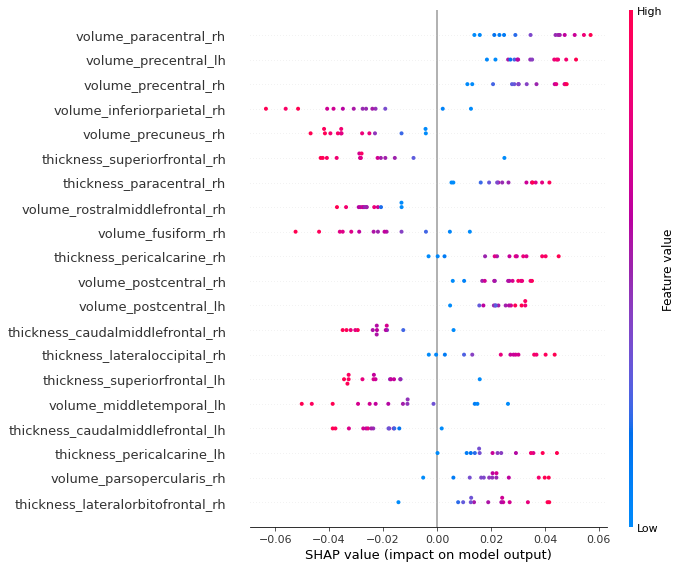

CPU times: user 4.83 s, sys: 208 ms, total: 5.04 s
Wall time: 1.06 s


In [58]:
%%time
print('Predictions on people with AD')
show_summary_plot(joined_df[joined_df.diag_icd10 == 'AD'].index.values)

Controls with predicted mean > 0.5 and std < 0.1


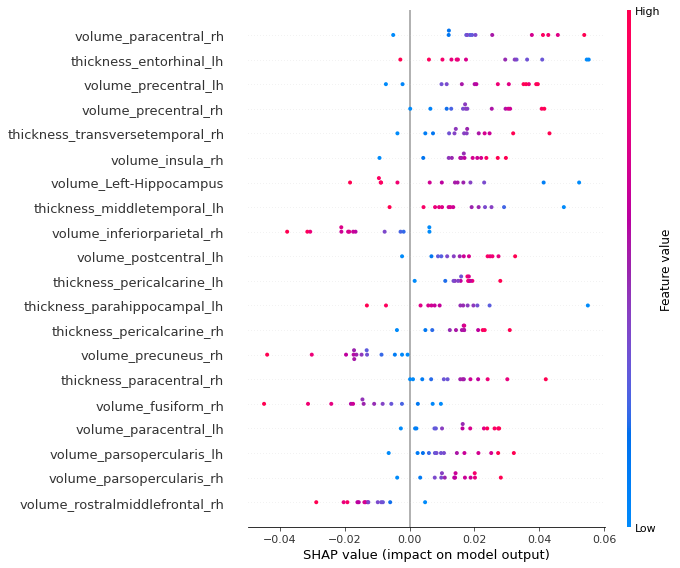

CPU times: user 4.95 s, sys: 204 ms, total: 5.16 s
Wall time: 1.05 s


In [113]:
%%time
print('Controls with predicted mean > 0.5 and std < 0.1')
show_summary_plot(certain_controls_predicted.index.values)

Controls with predicted mean < 0.5 and std < 0.1


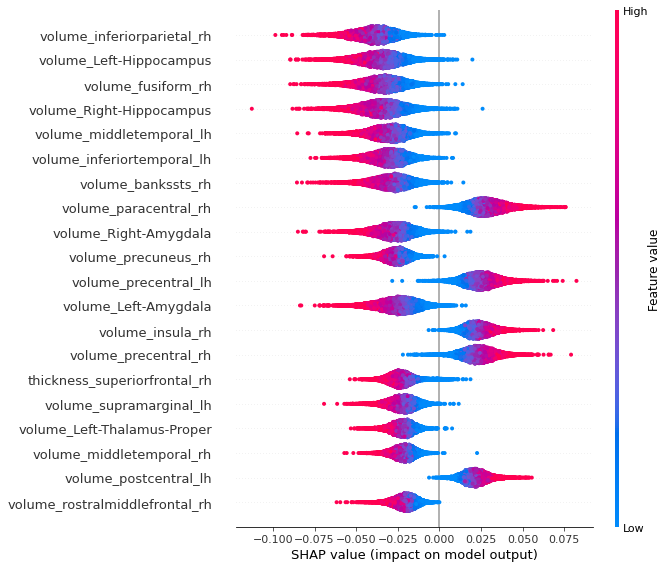

CPU times: user 28min 59s, sys: 1min 25s, total: 30min 25s
Wall time: 3min 50s


In [64]:
%%time
print('Controls with predicted mean < 0.5 and std < 0.1')
show_summary_plot(certain_controls.index.values)

(155,)

In [97]:
ids = joined_df[joined_df.diag_icd10 == 'AD'].index.values
X_tmp = np.array([ukb_dataset.X[i] for i, elem in enumerate(ukb_dataset.ids) if elem in ids])
shap_values = e.shap_values(torch.tensor(X_tmp).to(device))
#shap.summary_plot(shap_values, X_tmp, feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))

In [69]:
X_ids = [elem for elem in ukb_dataset.ids if elem in ids]
X_ids

[1174643,
 1383275,
 1471348,
 1502601,
 1878467,
 1971804,
 2511898,
 2718684,
 4199832,
 4652621,
 4747402,
 5276835,
 5382091,
 5821545]

In [106]:
id_where = np.where(np.array(X_ids) == 2511898)
id_where[0][0]

6

In [90]:
shap_values.shape 

(14, 155)

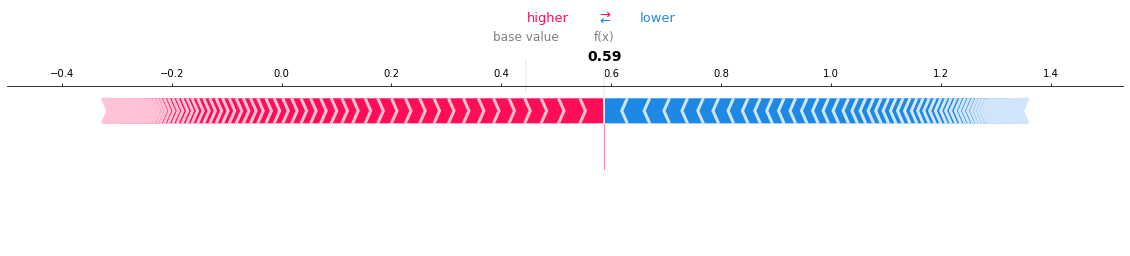

In [110]:
#X_tmp[id_where].shape
shap.force_plot(e.expected_value, shap_values[1,:], X_tmp[1,:], link='identity', feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA), matplotlib=True)

In [71]:
joined_df[joined_df.diag_icd10 == 'AD']#.sort_values(by='mean')

,mean,std,diag_icd10
1174643,0.843564,0.169936,AD
1383275,0.737736,0.246617,AD
1471348,0.616532,0.231237,AD
1502601,0.256988,0.205914,AD
1878467,0.553134,0.269960,AD
1971804,0.091417,0.122653,AD
2511898,0.090066,0.099041,AD
2718684,0.739687,0.256052,AD
4199832,0.933827,0.121932,AD
4652621,0.795463,0.230180,AD
